In [1]:
import pandas as pd

In [2]:
build_counters_df = pd.read_csv('builds_counters.csv')
champs_one = set(build_counters_df['champion'].values)
build_counters_df


,champion,starter_item,first_item,second_item,counter_one,counter_two
0,Aatrox,Doran's Blade,Black Cleaver,Iceborn Gauntlet,Wukong,Warwick
1,Ahri,Doran's Ring,Luden's Tempest,Shadow Flame,Annie,Cassiopeia
2,Akali,Doran's Shield,Hextech Rocketbelt,Shadow Flame,Taliyah,Annie
3,Akshan,Doran's Ring,Kraken Slayer,Blade of the Ruined King,Yasuo,Anivia
4,Alistar,Relic Shield,Locket of the Iron Solari,Knight's Vow,Taric,Janna
...,...,...,...,...,...,...
155,Zeri,Doran's Blade,Shieldbow,Runaan's Hurricane,Veigar,Seraphine
156,Ziggs,Doran's Ring,Luden's Tempest,Archangel's Staff,Akshan,Tristana
157,Zilean,Spellthief's Edge,Shurelya's Battlesong,Chemtech Putrifier,Annie,Rell
158,Zoe,Doran's Ring,Luden's Tempest,Shadowflame,Malzahar,Akshan


In [3]:
stats_df = pd.read_csv('League of Legends Champion Stats 12.23.csv', delimiter=';')
stats_df = stats_df.groupby('Name').first().reset_index()
stats_df


,Name,Class,Role,Tier,Score,Trend,Win %,Role %,Pick %,Ban %,KDA
0,Aatrox,Fighter,TOP,God,89.50,0.31,50.10%,90.37%,9.85%,20.80%,1.90
1,Ahri,Mage,MID,A,52.62,-2.26,49.64%,91.71%,5.37%,2.28%,2.40
2,Akali,Assassin,MID,S,61.16,-4.15,48.46%,75.48%,9.39%,15.86%,2.30
3,Akshan,Marksman,MID,A,49.05,-0.97,51.55%,64.06%,2.49%,3.87%,2.18
4,Alistar,Tank,SUPPORT,B,44.24,1.74,49.49%,94.80%,2.63%,0.66%,2.38
...,...,...,...,...,...,...,...,...,...,...,...
157,Zeri,Marksman,ADC,S,59.61,39.89,51.48%,92.60%,9.20%,3.90%,2.44
158,Ziggs,Mage,MID,B,48.01,1.73,51.68%,52.33%,1.41%,0.34%,2.40
159,Zilean,Support,MID,A,54.98,4.06,54.42%,12.95%,0.53%,1.78%,3.39
160,Zoe,Mage,MID,B,46.03,0.43,48.15%,82.83%,3.19%,1.21%,2.40


In [4]:
# champs_one.difference(champs_2)

In [5]:
temp_df = build_counters_df.merge(stats_df, left_on='champion', right_on='Name')

In [6]:
champions = temp_df[['champion', 'Class', 'Tier', 'Role', 'starter_item', 'first_item', 'second_item', 'counter_one', 'counter_two', 'Score', 'Trend', 'Win %', 'Role %', 'Pick %', 'Ban %']]
champions = champions.rename(columns={'champion': 'champ_name', 'Class': 'class', 'Tier': 'tier', 'Score': 'score', 'Trend': 'trend', 'Role': 'role',
                          'Win %': 'win_percentage', 'Role %': 'role_percentage', 'Pick %' : 'pick_percentage', 'Ban %': 'ban_percentage'})
champions

,champ_name,class,tier,role,starter_item,first_item,second_item,counter_one,counter_two,score,trend,win_percentage,role_percentage,pick_percentage,ban_percentage
0,Aatrox,Fighter,God,TOP,Doran's Blade,Black Cleaver,Iceborn Gauntlet,Wukong,Warwick,89.50,0.31,50.10%,90.37%,9.85%,20.80%
1,Ahri,Mage,A,MID,Doran's Ring,Luden's Tempest,Shadow Flame,Annie,Cassiopeia,52.62,-2.26,49.64%,91.71%,5.37%,2.28%
2,Akali,Assassin,S,MID,Doran's Shield,Hextech Rocketbelt,Shadow Flame,Taliyah,Annie,61.16,-4.15,48.46%,75.48%,9.39%,15.86%
3,Akshan,Marksman,A,MID,Doran's Ring,Kraken Slayer,Blade of the Ruined King,Yasuo,Anivia,49.05,-0.97,51.55%,64.06%,2.49%,3.87%
4,Alistar,Tank,B,SUPPORT,Relic Shield,Locket of the Iron Solari,Knight's Vow,Taric,Janna,44.24,1.74,49.49%,94.80%,2.63%,0.66%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,Zeri,Marksman,S,ADC,Doran's Blade,Shieldbow,Runaan's Hurricane,Veigar,Seraphine,59.61,39.89,51.48%,92.60%,9.20%,3.90%
155,Ziggs,Mage,B,MID,Doran's Ring,Luden's Tempest,Archangel's Staff,Akshan,Tristana,48.01,1.73,51.68%,52.33%,1.41%,0.34%
156,Zilean,Support,A,MID,Spellthief's Edge,Shurelya's Battlesong,Chemtech Putrifier,Annie,Rell,54.98,4.06,54.42%,12.95%,0.53%,1.78%
157,Zoe,Mage,B,MID,Doran's Ring,Luden's Tempest,Shadowflame,Malzahar,Akshan,46.03,0.43,48.15%,82.83%,3.19%,1.21%


In [7]:

champions['win_percentage'] = champions['win_percentage'].str.rstrip('%').astype(float)/100.0
champions['role_percentage'] = champions['role_percentage'].str.rstrip('%').astype(float)/100.0
champions['pick_percentage'] = champions['pick_percentage'].str.rstrip('%').astype(float)/100.0
champions['ban_percentage'] = champions['ban_percentage'].str.rstrip('%').astype(float)/100.0

champions

,champ_name,class,tier,role,starter_item,first_item,second_item,counter_one,counter_two,score,trend,win_percentage,role_percentage,pick_percentage,ban_percentage
0,Aatrox,Fighter,God,TOP,Doran's Blade,Black Cleaver,Iceborn Gauntlet,Wukong,Warwick,89.50,0.31,0.5010,0.9037,0.0985,0.2080
1,Ahri,Mage,A,MID,Doran's Ring,Luden's Tempest,Shadow Flame,Annie,Cassiopeia,52.62,-2.26,0.4964,0.9171,0.0537,0.0228
2,Akali,Assassin,S,MID,Doran's Shield,Hextech Rocketbelt,Shadow Flame,Taliyah,Annie,61.16,-4.15,0.4846,0.7548,0.0939,0.1586
3,Akshan,Marksman,A,MID,Doran's Ring,Kraken Slayer,Blade of the Ruined King,Yasuo,Anivia,49.05,-0.97,0.5155,0.6406,0.0249,0.0387
4,Alistar,Tank,B,SUPPORT,Relic Shield,Locket of the Iron Solari,Knight's Vow,Taric,Janna,44.24,1.74,0.4949,0.9480,0.0263,0.0066
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,Zeri,Marksman,S,ADC,Doran's Blade,Shieldbow,Runaan's Hurricane,Veigar,Seraphine,59.61,39.89,0.5148,0.9260,0.0920,0.0390
155,Ziggs,Mage,B,MID,Doran's Ring,Luden's Tempest,Archangel's Staff,Akshan,Tristana,48.01,1.73,0.5168,0.5233,0.0141,0.0034
156,Zilean,Support,A,MID,Spellthief's Edge,Shurelya's Battlesong,Chemtech Putrifier,Annie,Rell,54.98,4.06,0.5442,0.1295,0.0053,0.0178
157,Zoe,Mage,B,MID,Doran's Ring,Luden's Tempest,Shadowflame,Malzahar,Akshan,46.03,0.43,0.4815,0.8283,0.0319,0.0121


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
champions['class']

0       Fighter
1          Mage
2      Assassin
3      Marksman
4          Tank
         ...   
154    Marksman
155        Mage
156     Support
157        Mage
158        Mage
Name: class, Length: 159, dtype: object

In [30]:
champions = champions.dropna()
champions

,champ_name,class,tier,role,starter_item,first_item,second_item,counter_one,counter_two,score,trend,win_percentage,role_percentage,pick_percentage,ban_percentage
0,Aatrox,Fighter,God,TOP,Doran's Blade,Black Cleaver,Iceborn Gauntlet,Wukong,Warwick,89.50,0.31,0.5010,0.9037,0.0985,0.2080
1,Ahri,Mage,A,MID,Doran's Ring,Luden's Tempest,Shadow Flame,Annie,Cassiopeia,52.62,-2.26,0.4964,0.9171,0.0537,0.0228
2,Akali,Assassin,S,MID,Doran's Shield,Hextech Rocketbelt,Shadow Flame,Taliyah,Annie,61.16,-4.15,0.4846,0.7548,0.0939,0.1586
3,Akshan,Marksman,A,MID,Doran's Ring,Kraken Slayer,Blade of the Ruined King,Yasuo,Anivia,49.05,-0.97,0.5155,0.6406,0.0249,0.0387
4,Alistar,Tank,B,SUPPORT,Relic Shield,Locket of the Iron Solari,Knight's Vow,Taric,Janna,44.24,1.74,0.4949,0.9480,0.0263,0.0066
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,Zeri,Marksman,S,ADC,Doran's Blade,Shieldbow,Runaan's Hurricane,Veigar,Seraphine,59.61,39.89,0.5148,0.9260,0.0920,0.0390
155,Ziggs,Mage,B,MID,Doran's Ring,Luden's Tempest,Archangel's Staff,Akshan,Tristana,48.01,1.73,0.5168,0.5233,0.0141,0.0034
156,Zilean,Support,A,MID,Spellthief's Edge,Shurelya's Battlesong,Chemtech Putrifier,Annie,Rell,54.98,4.06,0.5442,0.1295,0.0053,0.0178
157,Zoe,Mage,B,MID,Doran's Ring,Luden's Tempest,Shadowflame,Malzahar,Akshan,46.03,0.43,0.4815,0.8283,0.0319,0.0121


Text(0.5, 1.0, 'Histogram of overall frequent classes')

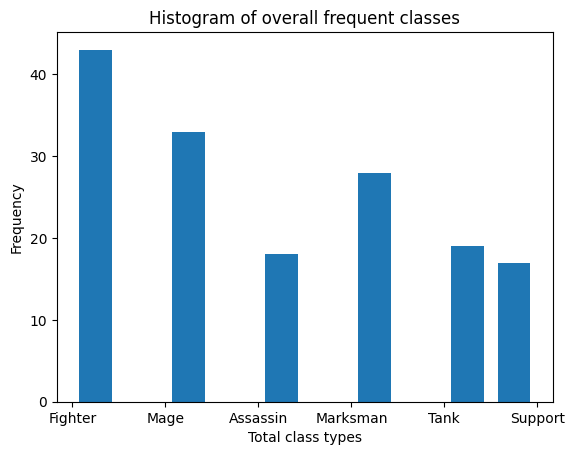

In [34]:
plt.hist(champions['class'], rwidth=0.7)
plt.xlabel('Total class types')
plt.ylabel('Frequency')
plt.title('Histogram of overall frequent classes')

<Axes: xlabel='class', ylabel='win_percentage'>

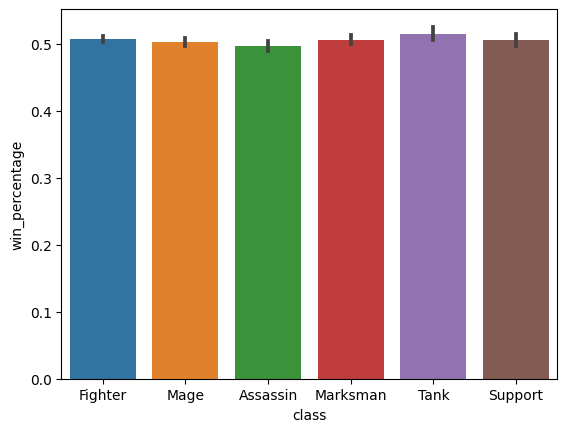

In [44]:
sns.barplot(x = 'class', y = 'win_percentage', data = champions)

<Axes: xlabel='pick_percentage', ylabel='win_percentage'>

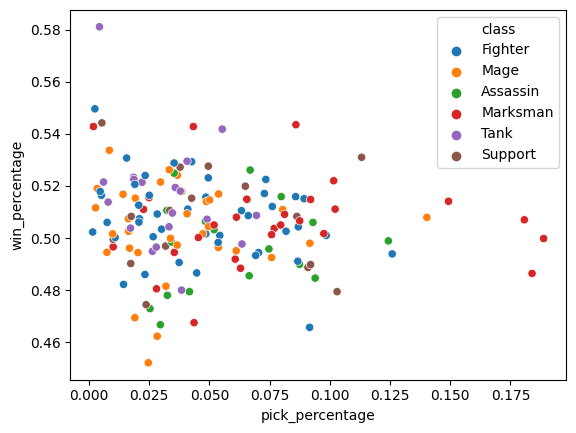

In [48]:
sns.scatterplot(x='pick_percentage', y='win_percentage', data=champions ,hue='class')

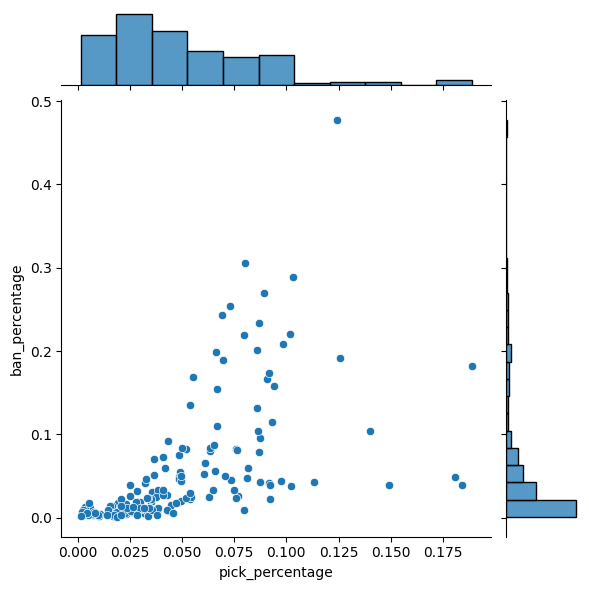

In [51]:
sns.jointplot(x='pick_percentage', y='ban_percentage', data=champions)